# **Title:- Text Classification Using TF-IDF and Word2Vec with Machine Learning and Deep Learning Models**

CSE440: Natural Language Processing  
Semester: Fall 2025  
Group: 04

Members:


1.   Tanjip Surait Mahdin - 22299341
2.   Khosnur Alam Shuchi - 22299167
3.   Irtija Hasnat Khan - 22201521

Dataset Link:-

Training Data:- https://drive.google.com/file/d/1dvjVJUYCT685-zqljqtw397NHsObny-g/view?usp=sharing

Testing Data:- https://drive.google.com/file/d/1JfenqMfPfklMbnx3tLrbU_JDtROdvReT/view?usp=drive_link


# Section-1: Project Setup, Dataset Loading, and Initial Inspection

## 1.1 Google Colab Setup
* pandas & numpy: handling CSV data efficiently

* matplotlib & seaborn: EDA plots

* BeautifulSoup: In the dataset there are HTML tags, so plain string cleaning is not enough

* display.max_colwidth: prevents text from being cut off when viewing samples

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from bs4 import BeautifulSoup
pd.set_option('display.max_colwidth', None)

## 1.2 Dataset Description


*   Training data: 93333 samples with 2 columns
*   Testing data: 59999 samples with 2 columns

There are 2 columns QA Text which contains object & Class which contains categorical labels.

The texts in QA text column is embedded inside HTML tags. So, data preprocessing is neccessary.

Note:- Target label is multi-class

There is no missing samples in both columns.

**Unique Class Labels**:
* Science & Mathematics
* Health
* Computers & Internet
* Education & Reference
* Entertainment & Music
* Politics & Government
* Business & Finance
* Family & Relationships
* Society & Culture
* Sports

Quick Summary:- In this step, we loaded the training and testing datasets, verified their structure,
checked for missing values, inspected class labels, and identified the presence of
HTML-formatted text. These observations guide the preprocessing and modeling choices
in later steps.


In [ ]:
train_df = pd.read_csv('/content/Question Answer Classification Dataset 4.csv')
test_df  = pd.read_csv('/content/[Updated] Question Answer Classification Dataset[Test].csv')

print("Training shape:", train_df.shape)
print("Testing shape:", test_df.shape)

Training shape: (93333, 2)
Testing shape: (59999, 2)


In [ ]:
train_df.head()

,QA Text,Class
0,"<html> Question Title:\n <br> What are the names of the 206 bones in the human body?\n <br> <br> <br><br><br> Question Content:\n <br> \n <br> <br>Best Answer:\n <br> 206 bones of the human body:\n\nSKULL - AXIAL SKELETON\nCranial Bones \n 2 parietal\n 2 temporal\n 1 frontal\n 1 occipital\n 1 sphenoid\n 1 ethmoid\n\nFacial Bones\n 1 mandible\n 1 vomer\n 2 maxillae\n 2 zygomatic\n 2 nasals\n 2 lacrimal\n 2 palatines\n 2 inferior conchae\n 1 Hyoid Bone \n\nEar Ossicles\n 2 Incus\n 2 Stapes\n 2 Malleus \n\nTHORACIC CAGE\n 1 Sternum \n 24 Ribs \n\nVertebral Column\n 7 Cervical\n 12 Thoracic\n 5 Lumbar\n 1 Sacrum\n 1 Coccyx\n\nAPPENDICULAR SKELETON\nPectoral Girdles\n 2 Clavicle \n 2 Scapula \n\nARMS\n 2 Humerus\n 2 Radius\n 2 Ulna \n\nHAND - Carpals\n 2 Scaphoid\n 2 Lunate\n 2 Trapezium\n 2 Trapezoid\n 2 Capitate\n 2 Hamate\n 2 Pisiform\n 2 Triquetrum\n\n Metacarpals - 2 Each of I, II, III, IV, V\n 28 Phalanges (10 Proximal 8 Middle (Not thumb) 10 Distal)\n\nPELVIC GIRDLE\n 2 Coxal, Hip or Pelvic Bone \n\nLEGS \n 2 Femur\n 2 Fibula\n 2 Tibia\n 2 Patella \n\nFEET - Tarsals\n 2 Calcaneus\n 2 Talus\n 2 Navicular\n 2 Cuboid\n 2 Medial Cuneiform\n 2 Intermediate Cuneiform\n 2 Lateral Cuneiform\n\n Metatarsals - 2 each of I, II, III, IV, V\n 28 Phalanges - (10 Proximal 8 Middle 10 Distal)\n\nTOTAL 206 </html>",Science & Mathematics
1,<html> Question Title:\n <br> can you tell me the university name in which i can do distance mphil foods & nutrition .?\n <br> <br> <br><br><br> Question Content:\n <br> \n <br> <br>Best Answer:\n <br> Nutrition Graduate Programs in United Kingdom and Ireland \nEarn Your Graduate Degree Online through the University of Phoenix. London Metropolitan University ... Nutrition; Glycaemic Index of Foods; Nutritional ...www.gradschools.com/listings/UK/nutrition_UK.html </html>,Education & Reference
2,"<html> Question Title:\n <br> Suggestions or Advice on tracking someone who owes you money from a small claims verdict and ""skipped town?""\n <br> <br> <br><br><br> Question Content:\n <br> I lent money to a former co-worker/friend from an old job. Was blown off when I asked to collect on loan and had to go to small-claims where I won the verdict. Person quit job when wage garnishment began and I have no idea where of if they are working. Court officer could find no property in defendants name to seize or to put a lien on. I know where the person used to bank but doubt they have much if any cash in an account- if they still have an account there. Former co-workers/mutual friends also have not heard from the person or, if they have, are not telling me (although I do have some ""inside"" help there so I pretty much believe them) anything. I cannot think of any other ideas (other than a p.i.) and the court is no help or offers any ideas. Any suggestions or am I eating the money?\n <br> <br>Best Answer:\n <br> See if you can talk a Bail Bondsman or a County Constable into helping you with a ""skip trace"" job. </html>",Politics & Government
3,"<html> Question Title:\n <br> where can i find the system of a down poem ""victims of a down""?\n <br> <br> <br><br><br> Question Content:\n <br> written by the guitarist of the band.\n <br> <br>Best Answer:\n <br> sorry.i dont no.mi sis buys all the cds & stuff.but...they rock! good choice of music.\nhope ya find it </html>",Entertainment & Music
4,<html> Question Title:\n <br> will the first tour match between india and south africa A be telecast? if so on which channel?\n <br> <br> <br><br><br> Question Content:\n <br> \n <br> <br>Best Answer:\n <br> No. The Tour match will not be telecasted. The first one day \nmatch to be held on 19.11.2006 and all other one day matches as well as test matches will be telecasted by ESPN Star Sports </html>,Sports


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93333 entries, 0 to 93332
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   QA Text  93333 non-null  object
 1   Class    93333 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [ ]:
train_df.isnull().sum()

,0
QA Text,0
Class,0


In [ ]:
train_df['Class'].unique()

array(['Science & Mathematics', 'Education & Reference',
       'Politics & Government', 'Entertainment & Music', 'Sports',
       'Society & Culture', 'Computers & Internet',
       'Family & Relationships', 'Business & Finance', 'Health'],
      dtype=object)

In [ ]:
sample_text = train_df['QA Text'].iloc[0]
print(sample_text)

<html> Question Title:
 <br> What are the names of the 206 bones in the human body?
 <br> <br> <br><br><br> Question Content:
 <br> 
 <br> <br>Best Answer:
 <br> 206 bones of the human body:\n\nSKULL - AXIAL SKELETON\nCranial Bones \n    2 parietal\n    2 temporal\n    1 frontal\n    1 occipital\n    1 sphenoid\n    1 ethmoid\n\nFacial Bones\n    1 mandible\n    1 vomer\n    2 maxillae\n    2 zygomatic\n    2 nasals\n    2 lacrimal\n    2 palatines\n    2 inferior conchae\n    1 Hyoid Bone \n\nEar Ossicles\n    2 Incus\n    2 Stapes\n    2 Malleus \n\nTHORACIC CAGE\n   1  Sternum \n    24 Ribs \n\nVertebral Column\n    7 Cervical\n    12 Thoracic\n    5 Lumbar\n    1 Sacrum\n    1 Coccyx\n\nAPPENDICULAR SKELETON\nPectoral Girdles\n    2 Clavicle \n    2 Scapula \n\nARMS\n    2 Humerus\n    2 Radius\n    2 Ulna \n\nHAND - Carpals\n    2 Scaphoid\n    2 Lunate\n    2 Trapezium\n    2 Trapezoid\n    2 Capitate\n    2 Hamate\n    2 Pisiform\n    2 Triquetrum\n\n    Metacarpals - 2 Each of 

# Section-2: Exploratory Data Analysis (EDA)

## 2.1 Class Distribution Analysis

The dataset exhibits well-balanced classes with sample counts ranging from 9,150 to 9,432 across 10 categories. All classes maintain similar representation , indicating minimal class imbalance.

Top 3 classes: Family & Relationships, Politics & Government (both 9,432 samples), Computers & Internet (9429)

Bottom 3 classes: Entertainment & Music (9,150), Science & Mathematics (9,217), Health (9,263)

In [ ]:
class_counts = train_df['Class'].value_counts()

class_counts

,count
Class,
Family & Relationships,9432
Politics & Government,9432
Computers & Internet,9429
Sports,9404
Education & Reference,9385
Business & Finance,9350
Society & Culture,9271
Health,9263
Science & Mathematics,9217


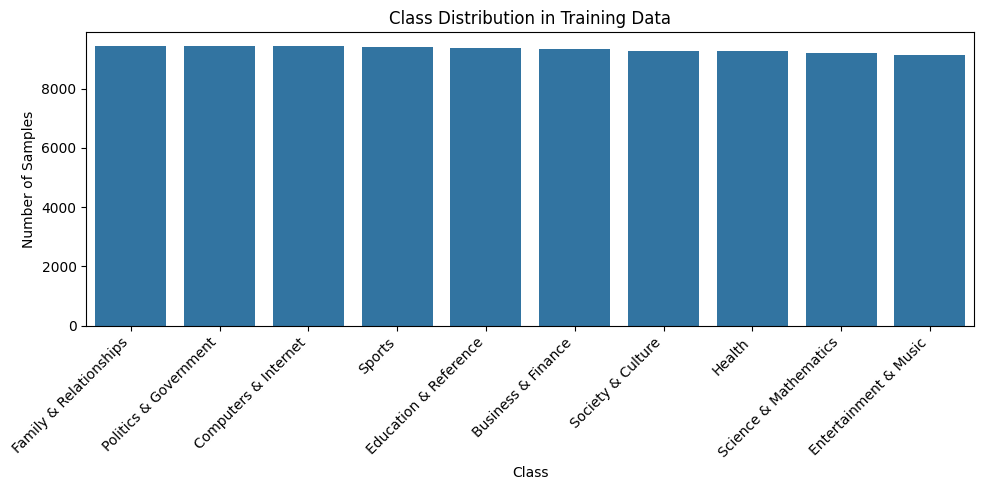

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=class_counts.index,
    y=class_counts.values
)
plt.xticks(rotation=45, ha='right')
plt.title("Class Distribution in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()

## 2.2 Text Length Analysis

The dataset exhibits wide variation in QA text length. Text length analysis provides insights into content complexity and preprocessing requirements.


The histogram reveals a right-skewed distribution where most texts are relatively short with a long tail extending beyond 6,000 characters. This suggests most questions and answers are concise, while a minority contain extensive content.


The boxplot demonstrates consistent text length patterns across all 10 classes. Each category shows similar median values, interquartile ranges, and outlier distributions, indicating that no particular topic domain systematically generates longer or shorter content. This uniformity supports applying consistent preprocessing and modeling approaches to all classes.

**Quick-summary**: The dataset contains 10 well-balanced topic categories with QA-style text of highly variable lengths. Text length distributions are consistent across classes, and all entries follow a structured HTML format. This balanced, content-rich dataset is suitable for multi-class NLP tasks with standard preprocessing for text cleaning and length normalization.

In [ ]:
train_df['text_length'] = train_df['QA Text'].apply(len)

train_df[['QA Text', 'text_length']].head()

,QA Text,text_length
0,"<html> Question Title:\n <br> What are the names of the 206 bones in the human body?\n <br> <br> <br><br><br> Question Content:\n <br> \n <br> <br>Best Answer:\n <br> 206 bones of the human body:\n\nSKULL - AXIAL SKELETON\nCranial Bones \n 2 parietal\n 2 temporal\n 1 frontal\n 1 occipital\n 1 sphenoid\n 1 ethmoid\n\nFacial Bones\n 1 mandible\n 1 vomer\n 2 maxillae\n 2 zygomatic\n 2 nasals\n 2 lacrimal\n 2 palatines\n 2 inferior conchae\n 1 Hyoid Bone \n\nEar Ossicles\n 2 Incus\n 2 Stapes\n 2 Malleus \n\nTHORACIC CAGE\n 1 Sternum \n 24 Ribs \n\nVertebral Column\n 7 Cervical\n 12 Thoracic\n 5 Lumbar\n 1 Sacrum\n 1 Coccyx\n\nAPPENDICULAR SKELETON\nPectoral Girdles\n 2 Clavicle \n 2 Scapula \n\nARMS\n 2 Humerus\n 2 Radius\n 2 Ulna \n\nHAND - Carpals\n 2 Scaphoid\n 2 Lunate\n 2 Trapezium\n 2 Trapezoid\n 2 Capitate\n 2 Hamate\n 2 Pisiform\n 2 Triquetrum\n\n Metacarpals - 2 Each of I, II, III, IV, V\n 28 Phalanges (10 Proximal 8 Middle (Not thumb) 10 Distal)\n\nPELVIC GIRDLE\n 2 Coxal, Hip or Pelvic Bone \n\nLEGS \n 2 Femur\n 2 Fibula\n 2 Tibia\n 2 Patella \n\nFEET - Tarsals\n 2 Calcaneus\n 2 Talus\n 2 Navicular\n 2 Cuboid\n 2 Medial Cuneiform\n 2 Intermediate Cuneiform\n 2 Lateral Cuneiform\n\n Metatarsals - 2 each of I, II, III, IV, V\n 28 Phalanges - (10 Proximal 8 Middle 10 Distal)\n\nTOTAL 206 </html>",1518
1,<html> Question Title:\n <br> can you tell me the university name in which i can do distance mphil foods & nutrition .?\n <br> <br> <br><br><br> Question Content:\n <br> \n <br> <br>Best Answer:\n <br> Nutrition Graduate Programs in United Kingdom and Ireland \nEarn Your Graduate Degree Online through the University of Phoenix. London Metropolitan University ... Nutrition; Glycaemic Index of Foods; Nutritional ...www.gradschools.com/listings/UK/nutrition_UK.html </html>,469
2,"<html> Question Title:\n <br> Suggestions or Advice on tracking someone who owes you money from a small claims verdict and ""skipped town?""\n <br> <br> <br><br><br> Question Content:\n <br> I lent money to a former co-worker/friend from an old job. Was blown off when I asked to collect on loan and had to go to small-claims where I won the verdict. Person quit job when wage garnishment began and I have no idea where of if they are working. Court officer could find no property in defendants name to seize or to put a lien on. I know where the person used to bank but doubt they have much if any cash in an account- if they still have an account there. Former co-workers/mutual friends also have not heard from the person or, if they have, are not telling me (although I do have some ""inside"" help there so I pretty much believe them) anything. I cannot think of any other ideas (other than a p.i.) and the court is no help or offers any ideas. Any suggestions or am I eating the money?\n <br> <br>Best Answer:\n <br> See if you can talk a Bail Bondsman or a County Constable into helping you with a ""skip trace"" job. </html>",1128
3,"<html> Question Title:\n <br> where can i find the system of a down poem ""victims of a down""?\n <br> <br> <br><br><br> Question Content:\n <br> written by the guitarist of the band.\n <br> <br>Best Answer:\n <br> sorry.i dont no.mi sis buys all the cds & stuff.but...they rock! good choice of music.\nhope ya find it </html>",319
4,<html> Question Title:\n <br> will the first tour match between india and south africa A be telecast? if so on which channel?\n <br> <br> <br><br><br> Question Content:\n <br> \n <br> <br>Best Answer:\n <br> No. The Tour match will not be telecasted. The first one day \nmatch to be held on 19.11.2006 and all other one day matches as well as test matches will be telecasted by ESPN Star Sports </html>,399


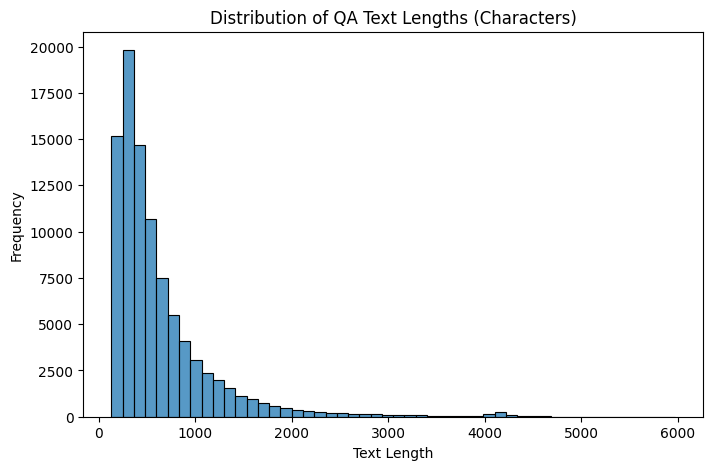

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df['text_length'], bins=50)
plt.title("Distribution of QA Text Lengths (Characters)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

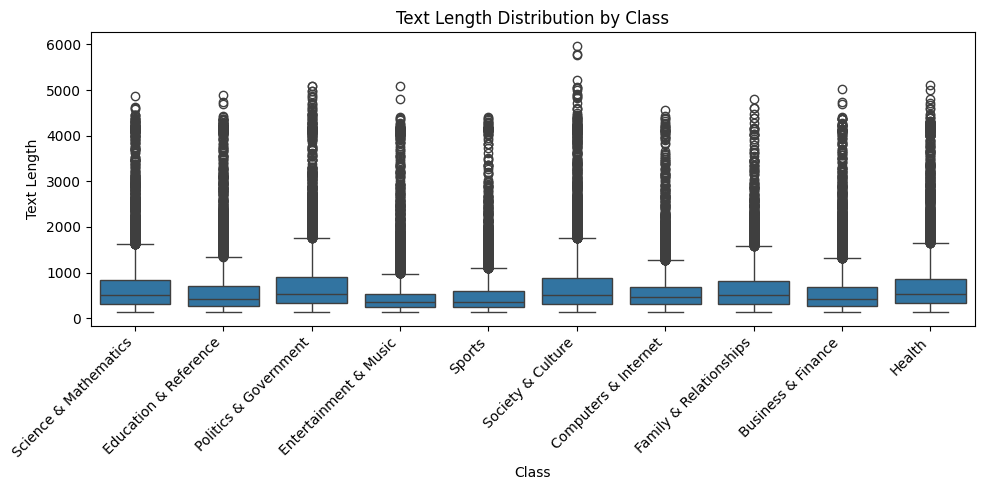

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='Class',
    y='text_length',
    data=train_df
)
plt.xticks(rotation=45, ha='right')
plt.title("Text Length Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Text Length")
plt.tight_layout()
plt.show()

In [ ]:
for label in train_df['Class'].unique():
    print("\nClass:", label)
    sample = train_df[train_df['Class'] == label]['QA Text'].iloc[0]
    print(sample[:300], "...")


Class: Science & Mathematics
<html> Question Title:
 <br> What are the names of the 206 bones in the human body?
 <br> <br> <br><br><br> Question Content:
 <br> 
 <br> <br>Best Answer:
 <br> 206 bones of the human body:\n\nSKULL - AXIAL SKELETON\nCranial Bones \n    2 parietal\n    2 temporal\n    1 frontal\n    1 occipital\n   ...

Class: Education & Reference
<html> Question Title:
 <br> can you tell me the university name in which i can do distance mphil foods & nutrition .?
 <br> <br> <br><br><br> Question Content:
 <br> 
 <br> <br>Best Answer:
 <br> Nutrition Graduate Programs in United Kingdom and Ireland \nEarn Your Graduate Degree Online through th ...

Class: Politics & Government
<html> Question Title:
 <br> Suggestions or Advice on tracking someone who owes you money from a small claims verdict and "skipped town?"
 <br> <br> <br><br><br> Question Content:
 <br> I lent money to a former co-worker/friend from an old job.  Was blown off when I asked to collect on loan and had 

# Section-3: HTML Parsing and Text Construction

## 3.1 Removing HTML Tags

The raw QA texts contain substantial HTML markup (including html, br, and other structural tags) that introduce noise and could interfere with natural language processing. These formatting elements do not contribute semantic value to the classification task and may adversely affect tokenization, embedding generation, and model performance.

BeautifulSoup was employed to systematically strip all HTML tags while preserving the textual content. This parser-based approach ensures robust handling of nested or malformed HTML structures commonly found in web-sourced data.

The cleaning process successfully:

* Removed all HTML tags while maintaining textual content integrity

* Preserved the QA structure
* Retained all semantic information crucial for classification

* Produced consistently formatted text across both training and test datasets

In [ ]:
raw_example = train_df['QA Text'].iloc[0]
print(raw_example)

<html> Question Title:
 <br> What are the names of the 206 bones in the human body?
 <br> <br> <br><br><br> Question Content:
 <br> 
 <br> <br>Best Answer:
 <br> 206 bones of the human body:\n\nSKULL - AXIAL SKELETON\nCranial Bones \n    2 parietal\n    2 temporal\n    1 frontal\n    1 occipital\n    1 sphenoid\n    1 ethmoid\n\nFacial Bones\n    1 mandible\n    1 vomer\n    2 maxillae\n    2 zygomatic\n    2 nasals\n    2 lacrimal\n    2 palatines\n    2 inferior conchae\n    1 Hyoid Bone \n\nEar Ossicles\n    2 Incus\n    2 Stapes\n    2 Malleus \n\nTHORACIC CAGE\n   1  Sternum \n    24 Ribs \n\nVertebral Column\n    7 Cervical\n    12 Thoracic\n    5 Lumbar\n    1 Sacrum\n    1 Coccyx\n\nAPPENDICULAR SKELETON\nPectoral Girdles\n    2 Clavicle \n    2 Scapula \n\nARMS\n    2 Humerus\n    2 Radius\n    2 Ulna \n\nHAND - Carpals\n    2 Scaphoid\n    2 Lunate\n    2 Trapezium\n    2 Trapezoid\n    2 Capitate\n    2 Hamate\n    2 Pisiform\n    2 Triquetrum\n\n    Metacarpals - 2 Each of 

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text(separator=" ")

In [ ]:
train_df['clean_text'] = train_df['QA Text'].apply(strip_html)
test_df['clean_text']  = test_df['QA Text'].apply(strip_html)

train_df[['QA Text', 'clean_text']].head()

,QA Text,clean_text
0,"<html> Question Title:\n <br> What are the names of the 206 bones in the human body?\n <br> <br> <br><br><br> Question Content:\n <br> \n <br> <br>Best Answer:\n <br> 206 bones of the human body:\n\nSKULL - AXIAL SKELETON\nCranial Bones \n 2 parietal\n 2 temporal\n 1 frontal\n 1 occipital\n 1 sphenoid\n 1 ethmoid\n\nFacial Bones\n 1 mandible\n 1 vomer\n 2 maxillae\n 2 zygomatic\n 2 nasals\n 2 lacrimal\n 2 palatines\n 2 inferior conchae\n 1 Hyoid Bone \n\nEar Ossicles\n 2 Incus\n 2 Stapes\n 2 Malleus \n\nTHORACIC CAGE\n 1 Sternum \n 24 Ribs \n\nVertebral Column\n 7 Cervical\n 12 Thoracic\n 5 Lumbar\n 1 Sacrum\n 1 Coccyx\n\nAPPENDICULAR SKELETON\nPectoral Girdles\n 2 Clavicle \n 2 Scapula \n\nARMS\n 2 Humerus\n 2 Radius\n 2 Ulna \n\nHAND - Carpals\n 2 Scaphoid\n 2 Lunate\n 2 Trapezium\n 2 Trapezoid\n 2 Capitate\n 2 Hamate\n 2 Pisiform\n 2 Triquetrum\n\n Metacarpals - 2 Each of I, II, III, IV, V\n 28 Phalanges (10 Proximal 8 Middle (Not thumb) 10 Distal)\n\nPELVIC GIRDLE\n 2 Coxal, Hip or Pelvic Bone \n\nLEGS \n 2 Femur\n 2 Fibula\n 2 Tibia\n 2 Patella \n\nFEET - Tarsals\n 2 Calcaneus\n 2 Talus\n 2 Navicular\n 2 Cuboid\n 2 Medial Cuneiform\n 2 Intermediate Cuneiform\n 2 Lateral Cuneiform\n\n Metatarsals - 2 each of I, II, III, IV, V\n 28 Phalanges - (10 Proximal 8 Middle 10 Distal)\n\nTOTAL 206 </html>","Question Title:\n What are the names of the 206 bones in the human body?\n Question Content:\n \n Best Answer:\n 206 bones of the human body:\n\nSKULL - AXIAL SKELETON\nCranial Bones \n 2 parietal\n 2 temporal\n 1 frontal\n 1 occipital\n 1 sphenoid\n 1 ethmoid\n\nFacial Bones\n 1 mandible\n 1 vomer\n 2 maxillae\n 2 zygomatic\n 2 nasals\n 2 lacrimal\n 2 palatines\n 2 inferior conchae\n 1 Hyoid Bone \n\nEar Ossicles\n 2 Incus\n 2 Stapes\n 2 Malleus \n\nTHORACIC CAGE\n 1 Sternum \n 24 Ribs \n\nVertebral Column\n 7 Cervical\n 12 Thoracic\n 5 Lumbar\n 1 Sacrum\n 1 Coccyx\n\nAPPENDICULAR SKELETON\nPectoral Girdles\n 2 Clavicle \n 2 Scapula \n\nARMS\n 2 Humerus\n 2 Radius\n 2 Ulna \n\nHAND - Carpals\n 2 Scaphoid\n 2 Lunate\n 2 Trapezium\n 2 Trapezoid\n 2 Capitate\n 2 Hamate\n 2 Pisiform\n 2 Triquetrum\n\n Metacarpals - 2 Each of I, II, III, IV, V\n 28 Phalanges (10 Proximal 8 Middle (Not thumb) 10 Distal)\n\nPELVIC GIRDLE\n 2 Coxal, Hip or Pelvic Bone \n\nLEGS \n 2 Femur\n 2 Fibula\n 2 Tibia\n 2 Patella \n\nFEET - Tarsals\n 2 Calcaneus\n 2 Talus\n 2 Navicular\n 2 Cuboid\n 2 Medial Cuneiform\n 2 Intermediate Cuneiform\n 2 Lateral Cuneiform\n\n Metatarsals - 2 each of I, II, III, IV, V\n 28 Phalanges - (10 Proximal 8 Middle 10 Distal)\n\nTOTAL 206"
1,<html> Question Title:\n <br> can you tell me the university name in which i can do distance mphil foods & nutrition .?\n <br> <br> <br><br><br> Question Content:\n <br> \n <br> <br>Best Answer:\n <br> Nutrition Graduate Programs in United Kingdom and Ireland \nEarn Your Graduate Degree Online through the University of Phoenix. London Metropolitan University ... Nutrition; Glycaemic Index of Foods; Nutritional ...www.gradschools.com/listings/UK/nutrition_UK.html </html>,Question Title:\n can you tell me the university name in which i can do distance mphil foods & nutrition .?\n Question Content:\n \n Best Answer:\n Nutrition Graduate Programs in United Kingdom and Ireland \nEarn Your Graduate Degree Online through the University of Phoenix. London Metropolitan University ... Nutrition; Glycaemic Index of Foods; Nutritional ...www.gradschools.com/listings/UK/nutrition_UK.html
2,"<html> Question Title:\n <br> Suggestions or Advice on tracking someone who owes you money from a small claims verdict and ""skipped town?""\n <br> <br> <br><br><br> Question Content:\n <br> I lent money to a former co-worker/friend from an old job. Was blown off when I asked to collect on loan and had to go to small-claims where I won the verdict. Person quit job when wage garnishment began and I have no idea where of if they are working. Court officer could find no property in defendants name t

## 3.2 Text Normalization and Cleaning

Following HTML tag removal, additional text normalization was performed to standardize the textual data for optimal NLP processing. This step addresses common inconsistencies in raw text that can hinder model performance.

Normalization Operations
* Case Normalization: Converted all text to lowercase to eliminate case-based variation

* Whitespace Standardization: Collapsed multiple spaces and newlines into single spaces

* Boundary Cleaning: Removed extraneous leading/trailing whitespace

In [ ]:
def normalize_text(text):
    text = text.lower()                    # Normalize case
    text = re.sub(r'\s+', ' ', text)       # Remove extra spaces
    text = re.sub(r'\n+', ' ', text)
    text = text.strip()
    return text

In [ ]:
train_df['clean_text'] = train_df['clean_text'].apply(normalize_text)
test_df['clean_text']  = test_df['clean_text'].apply(normalize_text)

train_df['clean_text'].iloc[0]

'question title: what are the names of the 206 bones in the human body? question content: best answer: 206 bones of the human body:\\n\\nskull - axial skeleton\\ncranial bones \\n 2 parietal\\n 2 temporal\\n 1 frontal\\n 1 occipital\\n 1 sphenoid\\n 1 ethmoid\\n\\nfacial bones\\n 1 mandible\\n 1 vomer\\n 2 maxillae\\n 2 zygomatic\\n 2 nasals\\n 2 lacrimal\\n 2 palatines\\n 2 inferior conchae\\n 1 hyoid bone \\n\\near ossicles\\n 2 incus\\n 2 stapes\\n 2 malleus \\n\\nthoracic cage\\n 1 sternum \\n 24 ribs \\n\\nvertebral column\\n 7 cervical\\n 12 thoracic\\n 5 lumbar\\n 1 sacrum\\n 1 coccyx\\n\\nappendicular skeleton\\npectoral girdles\\n 2 clavicle \\n 2 scapula \\n\\narms\\n 2 humerus\\n 2 radius\\n 2 ulna \\n\\nhand - carpals\\n 2 scaphoid\\n 2 lunate\\n 2 trapezium\\n 2 trapezoid\\n 2 capitate\\n 2 hamate\\n 2 pisiform\\n 2 triquetrum\\n\\n metacarpals - 2 each of i, ii, iii, iv, v\\n 28 phalanges (10 proximal 8 middle (not thumb) 10 distal)\\n\\npelvic girdle\\n 2 coxal, hip or p

In [ ]:
train_df['final_text'] = train_df['clean_text']
test_df['final_text']  = test_df['clean_text']

In [ ]:
print("BEFORE:\n")
print(train_df['QA Text'].iloc[2][:300])

print("\nAFTER:\n")
print(train_df['final_text'].iloc[2][:300])

BEFORE:

<html> Question Title:
 <br> Suggestions or Advice on tracking someone who owes you money from a small claims verdict and "skipped town?"
 <br> <br> <br><br><br> Question Content:
 <br> I lent money to a former co-worker/friend from an old job.  Was blown off when I asked to collect on loan and had 

AFTER:

question title: suggestions or advice on tracking someone who owes you money from a small claims verdict and "skipped town?" question content: i lent money to a former co-worker/friend from an old job. was blown off when i asked to collect on loan and had to go to small-claims where i won the verdic


In [ ]:
train_df['final_text_length'] = train_df['final_text'].apply(len)

train_df[['text_length', 'final_text_length']].head()

,text_length,final_text_length
0,1518,1247
1,469,401
2,1128,1054
3,319,252
4,399,329


# Section-4: Text Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## 4.1 Stopword Removal and Lemmatization

To reduce noise and improve model efficiency, English stopwords were removed and words were lemmatized to their base forms. This step reduces vocabulary size, eliminates non-informative words, and consolidates morphological variations.

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):

    text = re.sub(r'[^a-z\s]', '', text)

    tokens = text.split()

    # Remove stopwords and apply lemmatization
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word not in stop_words
    ]

    return " ".join(tokens)

In [ ]:
train_df['processed_text'] = train_df['final_text'].apply(preprocess_text)
test_df['processed_text']  = test_df['final_text'].apply(preprocess_text)

In [ ]:
idx = 5
print("ORIGINAL:\n", train_df['final_text'].iloc[idx])
print("\nPROCESSED:\n", train_df['processed_text'].iloc[idx])

ORIGINAL:
 question title: why is the world in such a mess? question content: best answer: because of all the whining done on yahoo answers..if you left wing weirdos would get off your butts and go to work this would be a wonderful world...come on, join the party and quit feeling sorry for yourself

PROCESSED:
 question title world mess question content best answer whining done yahoo answersif left wing weirdo would get butt go work would wonderful worldcome join party quit feeling sorry


In [ ]:
def vocab_size(text_series):
    vocab = set()
    for text in text_series:
        vocab.update(text.split())
    return len(vocab)

print("Vocabulary size before:", vocab_size(train_df['final_text']))
print("Vocabulary size after :", vocab_size(train_df['processed_text']))

Vocabulary size before: 521831
Vocabulary size after : 285521


# Section-5: TF-IDF Feature Representation

## 5.1 TF-IDF Vectorizer Configuration

TF-IDF (Term Frequency-Inverse Document Frequency) transforms text into numerical vectors that reflect word importance relative to document frequency. This representation captures discriminative terms while downweighting common words that appear across many documents.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    min_df=5
)

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['processed_text'])
X_test_tfidf  = tfidf_vectorizer.transform(test_df['processed_text'])

In [ ]:
print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Test Shape :", X_test_tfidf.shape)

TF-IDF Train Shape: (93333, 10000)
TF-IDF Test Shape : (59999, 10000)


In [ ]:
tfidf_vectorizer.get_feature_names_out()[:20]

array(['aa', 'aaron', 'ab', 'abandoned', 'abbreviation', 'abc', 'abdomen',
       'abdominal', 'ability', 'able', 'able find', 'able get',
       'able give', 'able go', 'able help', 'able make', 'able see',
       'able tell', 'abnormal', 'abortion'], dtype=object)

## 5.2 Label Encoding

For model training consistency, categorical labels were encoded numerically:

    'Business & Finance': 0,
    'Computers & Internet': 1,
    'Education & Reference': 2,
    'Entertainment & Music': 3,
    'Family & Relationships': 4,
    'Health': 5,
    'Politics & Government': 6,
    'Science & Mathematics': 7,
    'Society & Culture': 8,
    'Sports': 9

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(train_df['Class'])
y_test  = label_encoder.transform(test_df['Class'])

In [ ]:
label_mapping = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))
)

label_mapping

{'Business & Finance': np.int64(0),
 'Computers & Internet': np.int64(1),
 'Education & Reference': np.int64(2),
 'Entertainment & Music': np.int64(3),
 'Family & Relationships': np.int64(4),
 'Health': np.int64(5),
 'Politics & Government': np.int64(6),
 'Science & Mathematics': np.int64(7),
 'Society & Culture': np.int64(8),
 'Sports': np.int64(9)}

# Section-6: Traditional Machine Learning Models with TF-IDF

##
**Model Selection Rationale**

Four traditional ML classifiers were selected to establish baseline performance with TF-IDF features:

* Multinomial Naive Bayes - Probabilistic, efficient for text

* Logistic Regression - Linear discriminative model

* Linear SVM - Maximum margin classifier

* Random Forest - Ensemble non-linear approach

**Evaluation Framework**

All models were evaluated using:

* Macro-averaged F1-score: Accounts for class imbalance

* Accuracy: Overall classification rate

* Classification Report: Per-class precision/recall

* Confusion Matrix: Error pattern visualization

## 6.1 Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

param_grid = {
    "alpha": [0.1, 0.5, 1.0, 2.0]
}

nb = MultinomialNB()

grid_nb = GridSearchCV(
    nb,
    param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1
)

grid_nb.fit(X_train_tfidf, y_train)

best_nb = grid_nb.best_estimator_

y_pred_nb = best_nb.predict(X_test_tfidf)

nb_acc = accuracy_score(y_test, y_pred_nb)
nb_f1  = f1_score(y_test, y_pred_nb, average="macro")


In [ ]:
print(classification_report(
    y_test,
    y_pred_nb,
    target_names=label_encoder.classes_
))

                        precision    recall  f1-score   support

    Business & Finance       0.55      0.50      0.52      6000
  Computers & Internet       0.79      0.85      0.82      6000
 Education & Reference       0.53      0.46      0.49      6000
 Entertainment & Music       0.61      0.65      0.63      6000
Family & Relationships       0.62      0.77      0.69      5999
                Health       0.74      0.76      0.75      6000
 Politics & Government       0.74      0.71      0.73      6000
 Science & Mathematics       0.70      0.72      0.71      6000
     Society & Culture       0.59      0.53      0.55      6000
                Sports       0.85      0.78      0.81      6000

              accuracy                           0.67     59999
             macro avg       0.67      0.67      0.67     59999
          weighted avg       0.67      0.67      0.67     59999



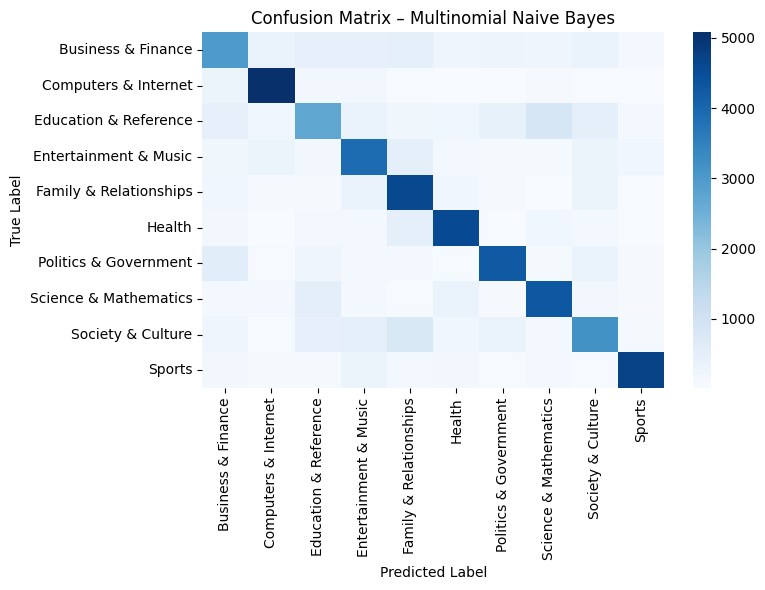

In [ ]:
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=False,
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Multinomial Naive Bayes")
plt.tight_layout()
plt.show()

In [ ]:
ml_results = {
    "Model": "Multinomial Naive Bayes",
    "Representation": "TF-IDF",
    "Accuracy": nb_acc,
    "Macro F1": nb_f1,
}

ml_results

{'Model': 'Multinomial Naive Bayes',
 'Representation': 'TF-IDF',
 'Accuracy': 0.6726278771312855,
 'Macro F1': 0.6700464775353516}

## 6.2 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

param_grid_lr = {
    "C": [0.1, 1, 5],
    "solver": ["liblinear", "lbfgs"]
}

grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1
)

grid_lr.fit(X_train_tfidf, y_train)

best_lr = grid_lr.best_estimator_
print("Best LR params:", grid_lr.best_params_)

y_pred_lr = best_lr.predict(X_test_tfidf)

lr_acc = accuracy_score(y_test, y_pred_lr)
lr_f1  = f1_score(y_test, y_pred_lr, average="macro")

lr_acc, lr_f1

Best LR params: {'C': 1, 'solver': 'liblinear'}


(0.6830947182453041, 0.6799461759289945)

## 6.3 Support Vector Machine (Linear)

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

param_grid_svm = {
    "C": [0.1, 1, 5]
}

grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1
)

grid_svm.fit(X_train_tfidf, y_train)

best_svm = grid_svm.best_estimator_
print("Best SVM params:", grid_svm.best_params_)

y_pred_svm = best_svm.predict(X_test_tfidf)

svm_acc = accuracy_score(y_test, y_pred_svm)
svm_f1  = f1_score(y_test, y_pred_svm, average="macro")

svm_acc, svm_f1

Best SVM params: {'C': 0.1}


(0.6857447624127069, 0.6804235660588629)

## 6.4 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [20, 40]
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1
)

grid_rf.fit(X_train_tfidf, y_train)

best_rf = grid_rf.best_estimator_
print("Best RF params:", grid_rf.best_params_)

y_pred_rf = best_rf.predict(X_test_tfidf)

rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1  = f1_score(y_test, y_pred_rf, average="macro")

rf_acc, rf_f1

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RF params: {'max_depth': 40, 'n_estimators': 200}


(0.5684761412690211, 0.5686905535235224)

# Section-7: Deep Learning with Dimensionality Reduced Features

In [ ]:
from sklearn.decomposition import TruncatedSVD
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)

X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd  = svd.transform(X_test_tfidf)

print("Train shape:", X_train_svd.shape)
print("Test shape:", X_test_svd.shape)

Train shape: (93333, 300)
Test shape: (59999, 300)


TF-IDF vectors (10,000 dimensions) are sparse and high-dimensional, posing challenges for neural networks. Truncated SVD (Singular Value Decomposition) reduces dimensionality while preserving semantic structure, enabling more efficient deep learning training.

## 7.1 Deep Neural Network

Architectural Decisions:

* Layer Sizes: 300 → 256 → 128 → 10 (progressive compression)

* Activation: ReLU for hidden layers (efficient gradient flow)

* Output: Softmax for multiclass probabilities

* Dropout: 40% dropout for regularization

* Parameters: ~100K total (efficient for dense features)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

num_classes = len(label_encoder.classes_)

baseline_dnn = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_svd.shape[1],)),
    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(num_classes, activation='softmax')
])

baseline_dnn.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = baseline_dnn.fit(
    X_train_svd,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4721 - loss: 1.6356 - val_accuracy: 0.6320 - val_loss: 1.1549
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6256 - loss: 1.1875 - val_accuracy: 0.6354 - val_loss: 1.1362
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6356 - loss: 1.1496 - val_accuracy: 0.6377 - val_loss: 1.1254
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6423 - loss: 1.1267 - val_accuracy: 0.6413 - val_loss: 1.1095
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6417 - loss: 1.1199 - val_accuracy: 0.6418 - val_loss: 1.1004
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6489 - loss: 1.0931 - val_accuracy: 0.6437 - val_loss: 1.0976
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6543 - loss: 1.0710 - val_accuracy: 0.6454 - val_loss: 1.0932
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6587 - loss: 1.0585 - 

In [ ]:
!pip install -q keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 12.5 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_dnn_model(hp):
    model = Sequential()

    model.add(Dense(
        units=hp.Int("units_1", min_value=128, max_value=512, step=128),
        activation="relu",
        input_shape=(X_train_svd.shape[1],)
    ))
    model.add(Dropout(
        hp.Float("dropout_1", min_value=0.3, max_value=0.6, step=0.1)
    ))

    model.add(Dense(
        units=hp.Int("units_2", min_value=64, max_value=256, step=64),
        activation="relu"
    ))
    model.add(Dropout(
        hp.Float("dropout_2", min_value=0.3, max_value=0.6, step=0.1)
    ))

    model.add(Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice("learning_rate", [1e-3, 5e-4])
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [ ]:
tuner = kt.RandomSearch(
    build_dnn_model,
    objective="val_accuracy",
    max_trials=5,
    executions_per_trial=1,
    directory="dnn_tuning",
    project_name="tfidf_dnn"
)

tuner.search(
    X_train_svd,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Trial 5 Complete [00h 00m 23s]
val_accuracy: 0.6408827900886536

Best val_accuracy So Far: 0.6416327357292175
Total elapsed time: 00h 02m 18s


In [ ]:
best_dnn_model = tuner.get_best_models(num_models=1)[0]

history = best_dnn_model.fit(
    X_train_svd,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6424 - loss: 1.1253 - val_accuracy: 0.6436 - val_loss: 1.1108
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6476 - loss: 1.1088 - val_accuracy: 0.6410 - val_loss: 1.1095
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6517 - loss: 1.0973 - val_accuracy: 0.6430 - val_loss: 1.1031
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6521 - loss: 1.0836 - val_accuracy: 0.6439 - val_loss: 1.0980
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6548 - loss: 1.0777 - val_accuracy: 0.6462 - val_loss: 1.0931
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6582 - loss: 1.0636 - val_accuracy: 0.6455 - val_loss: 1.0938
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6591 - loss: 1.0608 - val_accuracy: 0.6474 - val_loss: 1.0893
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6616 - loss: 1.0491 

In [ ]:
y_test_probs = best_dnn_model.predict(X_test_svd)
y_test_pred_dnn = np.argmax(y_test_probs, axis=1)

dnn_accuracy = accuracy_score(y_test, y_test_pred_dnn)
dnn_f1 = f1_score(y_test, y_test_pred_dnn, average='macro')

dnn_accuracy, dnn_f1

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


(0.6485108085134752, 0.6415335263198699)

# Section-8: Word2Vec Embeddings for Deep Learning

In [ ]:
!pip install -q gensim
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 63.8 MB/s eta 0:00:00


Traditional TF-IDF representations lack semantic relationships between words. Word2Vec captures semantic and syntactic word relationships through distributed representations, enabling models to understand word similarity and context.

In [ ]:
cleaned_texts = train_df['processed_text'].tolist()

In [ ]:
tokenized_texts = [text.split() for text in cleaned_texts]

**Model Architecture Choice**

* Skip-gram (sg=1): Predicts context words given target word

* Vector Size 100: Balances expressiveness and computational cost

* Window Size 5: Captures medium-range dependencies

* Min Count 2: Filters out rare words to reduce noise

In [ ]:
w2v_model = Word2Vec(
    sentences=tokenized_texts,
    vector_size=100,
    window=5,
    min_count=2,
    sg=1,          # sg=1 → Skip-gram
    workers=4,
    epochs=10
)

In [ ]:
word_index = {word: idx + 1 for idx, word in enumerate(w2v_model.wv.index_to_key)}

In [ ]:
sequences = []

for sentence in tokenized_texts:
    seq = []
    for word in sentence:
        if word in word_index:
            seq.append(word_index[word])
    sequences.append(seq)

In [ ]:
MAX_LEN = 100

X_padded = pad_sequences(
    sequences,
    maxlen=MAX_LEN,
    padding='post',
    truncating='post'
)

In [ ]:
# Encode class labels again (safe and clean)
y = label_encoder.transform(train_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split


X_train_seq, X_test_seq, y_train_w2v, y_test_w2v = train_test_split(
    X_padded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
import numpy as np

embedding_dim = 100
vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, idx in word_index.items():
    embedding_matrix[idx] = w2v_model.wv[word]

**Summary of Skip-gram Representation**

* Skip-gram Word2Vec captures semantic relationships effectively

* Fixed-length padded sequences enable neural network training

* Embedding matrix allows weight initialization for downstream models

* This representation is used by DNN, SimpleRNN, GRU, LSTM, Bi-RNN models

# Section-9: Neural Network Models with Word2Vec Embeddings

## 9.1 Averaged Word2Vec Feedforward Network

In [ ]:
def average_word2vec(sequence, embedding_matrix):
    vectors = []
    for idx in sequence:
        if idx != 0:
            vectors.append(embedding_matrix[idx])
    if len(vectors) == 0:
        return np.zeros(embedding_matrix.shape[1])
    return np.mean(vectors, axis=0)

In [ ]:
X_train_w2v = np.array([
    average_word2vec(seq, embedding_matrix)
    for seq in X_train_seq
])

X_test_w2v = np.array([
    average_word2vec(seq, embedding_matrix)
    for seq in X_test_seq
])

## 9.2 DNN Architecture for Document Vectors

In [ ]:
def build_dnn_w2v(hp):
    model = Sequential()

    model.add(Dense(
        hp.Int("units_1", 64, 256, step=64),
        activation="relu",
        input_shape=(X_train_w2v.shape[1],)
    ))
    model.add(Dropout(hp.Float("dropout_1", 0.3, 0.6, step=0.1)))

    model.add(Dense(
        hp.Int("units_2", 32, 128, step=32),
        activation="relu"
    ))
    model.add(Dropout(hp.Float("dropout_2", 0.3, 0.6, step=0.1)))

    model.add(Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice("lr", [1e-3, 5e-4])
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [ ]:
tuner_dnn = kt.RandomSearch(
    build_dnn_w2v,
    objective="val_accuracy",
    max_trials=5,
    directory="w2v_tuning",
    project_name="dnn_w2v"
)

tuner_dnn.search(
    X_train_w2v,
    y_train_w2v,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

best_dnn_w2v = tuner_dnn.get_best_models(1)[0]

Trial 5 Complete [00h 00m 20s]
val_accuracy: 0.6820677518844604

Best val_accuracy So Far: 0.6820677518844604
Total elapsed time: 00h 01m 43s


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_pred_dnn_w2v = np.argmax(best_dnn_w2v.predict(X_test_seq), axis=1)

dnn_w2v_acc = accuracy_score(y_test_w2v, y_pred_dnn_w2v)
dnn_w2v_f1   = f1_score(y_test_w2v, y_pred_dnn_w2v, average="macro")

dnn_w2v_acc , dnn_w2v_f1

584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(0.1030160175711148, 0.091936515529115)

## 9.3 LSTM Model Architecture

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
from tensorflow.keras.layers import LSTM

def build_lstm(hp):
    model = Sequential([
        Embedding(
            vocab_size,
            embedding_dim,
            weights=[embedding_matrix],
            input_length=MAX_LEN,
            trainable=False
        ),
        LSTM(hp.Int("units", 64, 256, step=64)),
        Dropout(hp.Float("dropout", 0.3, 0.6, step=0.1)),
        Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(hp.Choice("lr", [1e-3, 5e-4])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [ ]:
tuner = kt.RandomSearch(
    build_lstm,   # change builder as needed
    objective="val_accuracy",
    max_trials=5,
    directory="w2v_tuning",
    project_name="lstm_w2v"
)

tuner.search(
    X_train_seq,
    y_train_w2v,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

best_model = tuner.get_best_models(1)[0]

Trial 5 Complete [00h 00m 53s]
val_accuracy: 0.6848801374435425

Best val_accuracy So Far: 0.6915762424468994
Total elapsed time: 00h 04m 20s


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_pred_lstm = np.argmax(best_model.predict(X_test_seq), axis=1)

lstm_acc = accuracy_score(y_test_w2v, y_pred_lstm)
lstm_f1  = f1_score(y_test_w2v, y_pred_lstm, average="macro")

lstm_acc , lstm_f1

584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


(0.6813628328065571, 0.6755784963516556)

## 9.4 Simple RNN Model

In [ ]:
from tensorflow.keras.layers import Embedding, SimpleRNN

def build_simple_rnn(hp):
    model = Sequential([
        Embedding(
            vocab_size,
            embedding_dim,
            weights=[embedding_matrix],
            input_length=MAX_LEN,
            trainable=False
        ),
        SimpleRNN(
            hp.Int("units", 64, 256, step=64)
        ),
        Dropout(hp.Float("dropout", 0.3, 0.6, step=0.1)),
        Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(hp.Choice("lr", [1e-3, 5e-4])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [ ]:
tuner_simple_rnn = kt.RandomSearch(
    build_simple_rnn,
    objective="val_accuracy",
    max_trials=5,
    directory="w2v_tuning",
    project_name="simple_rnn"
)

tuner_simple_rnn.search(
    X_train_seq,
    y_train_w2v,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

best_simple_rnn = tuner_simple_rnn.get_best_models(1)[0]

Trial 5 Complete [00h 00m 59s]
val_accuracy: 0.19003616273403168

Best val_accuracy So Far: 0.21186554431915283
Total elapsed time: 00h 04m 43s


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_pred_simple_rnn = np.argmax(best_simple_rnn.predict(X_test_seq), axis=1)

rnn_acc = accuracy_score(y_test_w2v, y_pred_simple_rnn)
rnn_f1  = f1_score(y_test_w2v, y_pred_simple_rnn, average="macro")

rnn_acc, rnn_f1

584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


(0.20876412921197834, 0.14453453486999732)

## 9.5 GRU Model

In [ ]:
from tensorflow.keras.layers import GRU

def build_gru(hp):
    model = Sequential([
        Embedding(
            vocab_size,
            embedding_dim,
            weights=[embedding_matrix],
            input_length=MAX_LEN,
            trainable=False
        ),
        GRU(hp.Int("units", 64, 256, step=64)),
        Dropout(hp.Float("dropout", 0.3, 0.6, step=0.1)),
        Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(hp.Choice("lr", [1e-3, 5e-4])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [ ]:
tuner_gru = kt.RandomSearch(
    build_gru,
    objective="val_accuracy",
    max_trials=5,
    directory="w2v_tuning",
    project_name="gru"
)

tuner_gru.search(
    X_train_seq,
    y_train_w2v,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

best_gru = tuner_gru.get_best_models(1)[0]

Trial 5 Complete [00h 00m 49s]
val_accuracy: 0.7072452306747437

Best val_accuracy So Far: 0.7072452306747437
Total elapsed time: 00h 04m 00s


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_pred_gru = np.argmax(best_gru.predict(X_test_seq), axis=1)

gru_acc = accuracy_score(y_test_w2v, y_pred_gru)
gru_f1  = f1_score(y_test_w2v, y_pred_gru, average="macro")

gru_acc, gru_f1

584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


(0.7044517062195318, 0.6967088731975887)

## 9.6 Bidirectional RNN

In [ ]:
from tensorflow.keras.layers import Bidirectional
def build_birnn(hp):
    model = Sequential([
        Embedding(
            vocab_size,
            embedding_dim,
            weights=[embedding_matrix],
            input_length=MAX_LEN,
            trainable=False
        ),
        Bidirectional(
            SimpleRNN(
                units=hp.Int("units", 64, 256, step=64)
            )
        ),
        Dropout(
            hp.Float("dropout", 0.3, 0.6, step=0.1)
        ),
        Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice("lr", [1e-3, 5e-4])
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [ ]:
tuner_birnn = kt.RandomSearch(
    build_birnn,
    objective="val_accuracy",
    max_trials=5,
    directory="w2v_tuning",
    project_name="birnn"
)

tuner_birnn.search(
    X_train_seq,
    y_train_w2v,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

best_birnn = tuner_birnn.get_best_models(1)[0]

Trial 5 Complete [00h 01m 58s]
val_accuracy: 0.673898458480835

Best val_accuracy So Far: 0.6745681166648865
Total elapsed time: 00h 08m 29s


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_pred_birnn = np.argmax(best_birnn.predict(X_test_seq), axis=1)

birnn_acc = accuracy_score(y_test_w2v, y_pred_birnn)
birnn_f1  = f1_score(y_test_w2v, y_pred_birnn, average="macro")

birnn_acc, birnn_f1

584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


(0.6660416778271817, 0.6605592929636104)

## 9.7 Bidirectional GRU

In [ ]:
def build_bigru(hp):
    model = Sequential([
        Embedding(
            vocab_size,
            embedding_dim,
            weights=[embedding_matrix],
            input_length=MAX_LEN,
            trainable=False
        ),
        Bidirectional(
            GRU(
                units=hp.Int("units", 64, 256, step=64)
            )
        ),
        Dropout(
            hp.Float("dropout", 0.3, 0.6, step=0.1)
        ),
        Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(
            learning_rate=hp.Choice("lr", [1e-3, 5e-4])
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [ ]:
tuner_bigru = kt.RandomSearch(
    build_bigru,
    objective="val_accuracy",
    max_trials=5,
    directory="w2v_tuning",
    project_name="bigru"
)

tuner_bigru.search(
    X_train_seq,
    y_train_w2v,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

best_bigru = tuner_bigru.get_best_models(1)[0]

Trial 5 Complete [00h 01m 17s]
val_accuracy: 0.7032275199890137

Best val_accuracy So Far: 0.7104593515396118
Total elapsed time: 00h 07m 22s


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
y_pred_bigru = np.argmax(best_bigru.predict(X_test_seq), axis=1)

bigru_acc = accuracy_score(y_test_w2v, y_pred_bigru)
bigru_f1  = f1_score(y_test_w2v, y_pred_bigru, average="macro")

bigru_acc, bigru_f1

584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


(0.7010767664863128, 0.6968216764568563)

## 9.8 Bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional

def build_bilstm(hp):
    model = Sequential([
        Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            weights=[embedding_matrix],
            trainable=False  # don't train pre-trained embeddings
        ),
        Bidirectional(
            LSTM(hp.Int("units", 64, 256, step=64))
        ),
        Dropout(hp.Float("dropout", 0.3, 0.6, step=0.1)),
        Dense(num_classes, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(hp.Choice("lr", [1e-3, 5e-4])),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model


In [ ]:
tuner.search(
    X_train_seq,
    y_train_w2v,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

# Instead of loading the model directly, get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(1)[0]

# Rebuild the model using the best hyperparameters
best_model = build_bilstm(best_hp)

# Train the best model
best_model.fit(
    X_train_seq,
    y_train_w2v,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.5793 - loss: 1.3077 - val_accuracy: 0.6822 - val_loss: 0.9977
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.6862 - loss: 0.9869 - val_accuracy: 0.6921 - val_loss: 0.9598
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.6960 - loss: 0.9436 - val_accuracy: 0.7030 - val_loss: 0.9261
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.7108 - loss: 0.9020 - val_accuracy: 0.7042 - val_loss: 0.9117
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7154 - loss: 0.8807 - val_accuracy: 0.7099 - val_loss: 0.9111


In [ ]:
y_pred_bilstm = np.argmax(best_model.predict(X_test_seq), axis=1)

bilstm_acc = accuracy_score(y_test_w2v, y_pred_bilstm)
bilstm_f1  = f1_score(y_test_w2v, y_pred_bilstm, average="macro")

bilstm_acc, bilstm_f1

584/584 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


(0.7023088873412975, 0.6989176831807837)

# Section-10: Comparative Analysis and Model Selection

## 10.1 Comprehensive Performance Comparison

In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Model": [
        "Naive Bayes (TF-IDF)",
        "Logistic Regression (TF-IDF)",
        "SVM (TF-IDF)",
        "Random Forest (TF-IDF)",
        "DNN (Word2Vec)",
        "SimpleRNN (Word2Vec)",
        "GRU (Word2Vec)",
        "LSTM (Word2Vec)",
        "BiRNN (Word2Vec)",
        "BiGRU (Word2Vec)",
        "BiLSTM (Word2Vec)"
    ],
    "Accuracy": [
        nb_acc,
        lr_acc,
        svm_acc,
        rf_acc,
        dnn_w2v_acc,
        rnn_acc,
        gru_acc,
        lstm_acc,
        birnn_acc,
        bigru_acc,
        bilstm_acc
    ],
    "Macro F1-Score": [
        nb_f1,
        lr_f1,
        svm_f1,
        rf_f1,
        dnn_w2v_f1,
        rnn_f1,
        gru_f1,
        lstm_f1,
        birnn_f1,
        bigru_f1,
        bilstm_f1
    ]
})

results

,Model,Accuracy,Macro F1-Score
0,Naive Bayes (TF-IDF),0.672628,0.670046
1,Logistic Regression (TF-IDF),0.683095,0.679946
2,SVM (TF-IDF),0.685745,0.680424
3,Random Forest (TF-IDF),0.568476,0.568691
4,DNN (Word2Vec),0.103016,0.091937
5,SimpleRNN (Word2Vec),0.208764,0.144535
6,GRU (Word2Vec),0.704452,0.696709
7,LSTM (Word2Vec),0.681363,0.675578
8,BiRNN (Word2Vec),0.666042,0.660559
9,BiGRU (Word2Vec),0.701077,0.696822


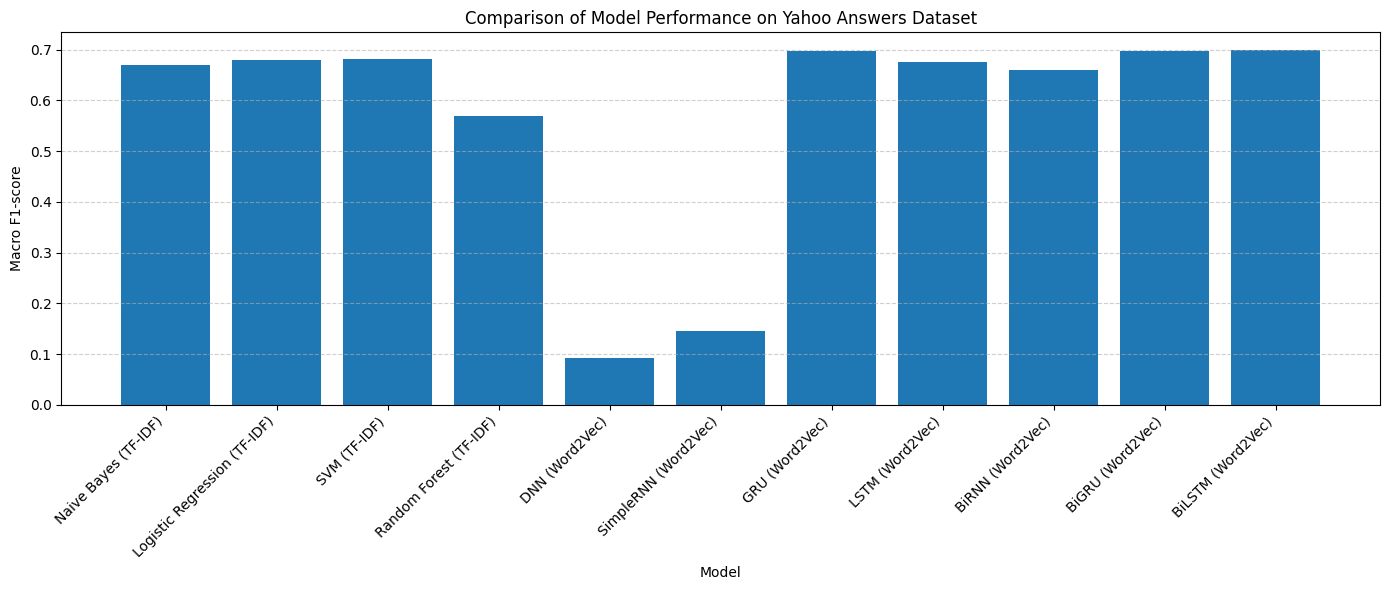

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.bar(
    results["Model"],
    results["Macro F1-Score"]
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Macro F1-score")
plt.xlabel("Model")
plt.title("Comparison of Model Performance on Yahoo Answers Dataset")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

## 10.2  Optimal Model Selection

In [ ]:
best_model_name = results.sort_values(
    by="Macro F1-Score",
    ascending=False
).iloc[0]

best_model_name

,10
Model,BiLSTM (Word2Vec)
Accuracy,0.702309
Macro F1-Score,0.698918


## 10.3 Performance Visualization

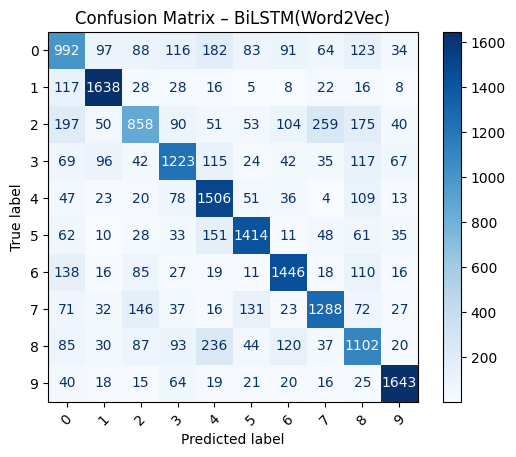

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_w2v, y_pred_bilstm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix – BiLSTM(Word2Vec)")
plt.show()